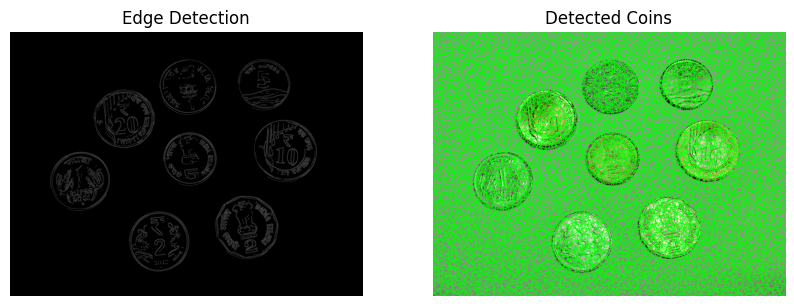

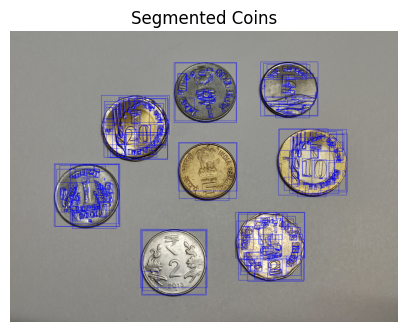

Total number of coins detected: 1034


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('coins.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to smooth the image
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Use Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Detect circles using Hough Transform
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
                           param1=50, param2=30, minRadius=20, maxRadius=100)

# Make a copy of the image to draw detected circles
detected_coins = image.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        cv2.circle(detected_coins, (x, y), r, (0, 255, 0), 3)

# Display detected coins
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.title("Edge Detection")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(detected_coins, cv2.COLOR_BGR2RGB))
plt.title("Detected Coins")
plt.axis('off')

plt.show()

# SEGMENTATION: Extract each coin using contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create masks for each detected coin
segmented_coins = image.copy()

for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    coin_roi = image[y:y+h, x:x+w]
    cv2.rectangle(segmented_coins, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display segmented coins
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(segmented_coins, cv2.COLOR_BGR2RGB))
plt.title("Segmented Coins")
plt.axis('off')
plt.show()

# COUNT THE TOTAL NUMBER OF COINS
total_coins = len(contours)
print(f"Total number of coins detected: {total_coins}")


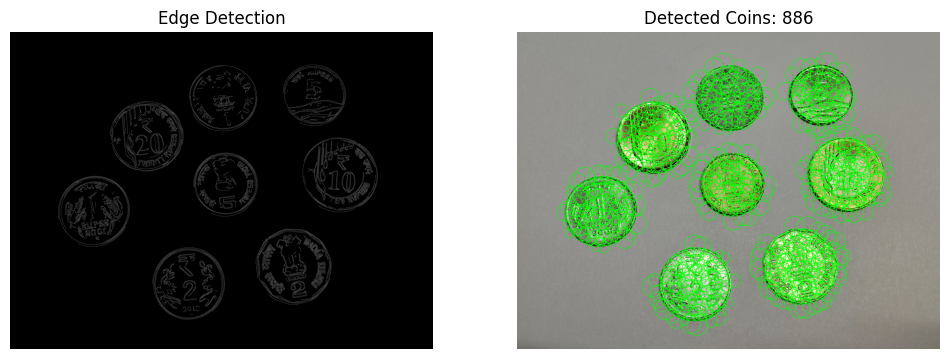

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('coins.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to smooth the image
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Detect edges using Canny Edge Detector
edges = cv2.Canny(blurred, 50, 150)

# Use HoughCircles to detect circular shapes (coins)
circles = cv2.HoughCircles(
    gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
    param1=100, param2=30, minRadius=20, maxRadius=100
)

# Draw detected circles on the original image
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 3)  # Draw outer circle
        cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)  # Draw center

# Count the number of coins detected
num_coins = len(circles[0]) if circles is not None else 0

# Display the results using Matplotlib
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
ax[0].set_title("Edge Detection")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[1].set_title(f"Detected Coins: {num_coins}")
ax[1].axis("off")

plt.show()


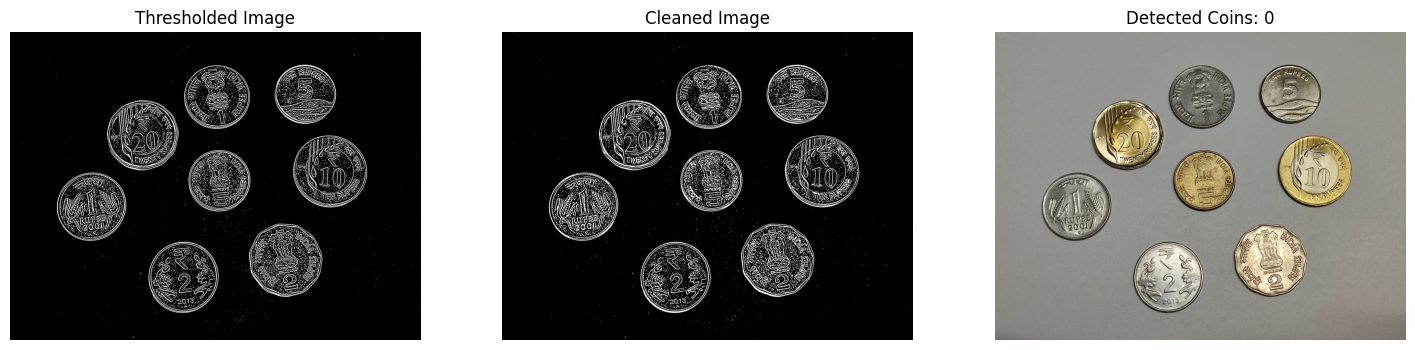

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('coins.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Use Adaptive Thresholding for better segmentation
thresh = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 2
)

# Perform morphological operations to remove small noise
kernel = np.ones((5, 5), np.uint8)
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Find contours (potential coins)
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area and circularity
valid_coins = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    
    if perimeter == 0:  # Avoid division by zero
        continue
    
    circularity = 4 * np.pi * (area / (perimeter * perimeter))
    
    if 0.7 < circularity < 1.2 and 500 < area < 5000:  # Approximate range for coins
        valid_coins.append(cnt)

# Draw detected coins on the original image
output_image = image.copy()
for coin in valid_coins:
    cv2.drawContours(output_image, [coin], -1, (0, 255, 0), 3)

# Count the number of coins detected
num_coins = len(valid_coins)

# Display the results using Matplotlib
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
ax[0].set_title("Thresholded Image")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(cleaned, cv2.COLOR_BGR2RGB))
ax[1].set_title("Cleaned Image")
ax[1].axis("off")

ax[2].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
ax[2].set_title(f"Detected Coins: {num_coins}")
ax[2].axis("off")

plt.show()

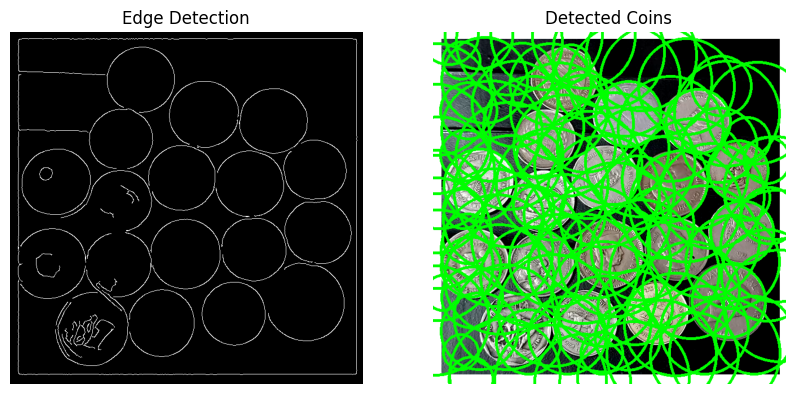

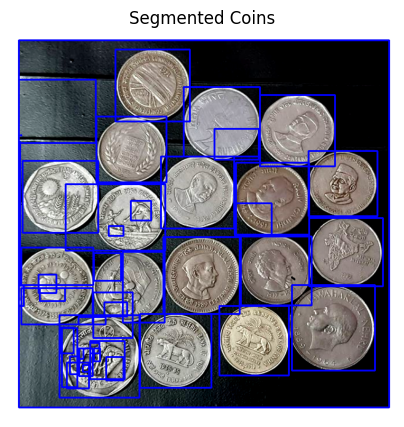

Total number of coins detected: 46


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('image.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to smooth the image
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Use Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Detect circles using Hough Transform
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
                           param1=50, param2=30, minRadius=20, maxRadius=100)

# Make a copy of the image to draw detected circles
detected_coins = image.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        cv2.circle(detected_coins, (x, y), r, (0, 255, 0), 3)

# Display detected coins
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.title("Edge Detection")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(detected_coins, cv2.COLOR_BGR2RGB))
plt.title("Detected Coins")
plt.axis('off')

plt.show()

# SEGMENTATION: Extract each coin using contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create masks for each detected coin
segmented_coins = image.copy()

for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    coin_roi = image[y:y+h, x:x+w]
    cv2.rectangle(segmented_coins, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display segmented coins
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(segmented_coins, cv2.COLOR_BGR2RGB))
plt.title("Segmented Coins")
plt.axis('off')
plt.show()

# COUNT THE TOTAL NUMBER OF COINS
total_coins = len(contours)
print(f"Total number of coins detected: {total_coins}")


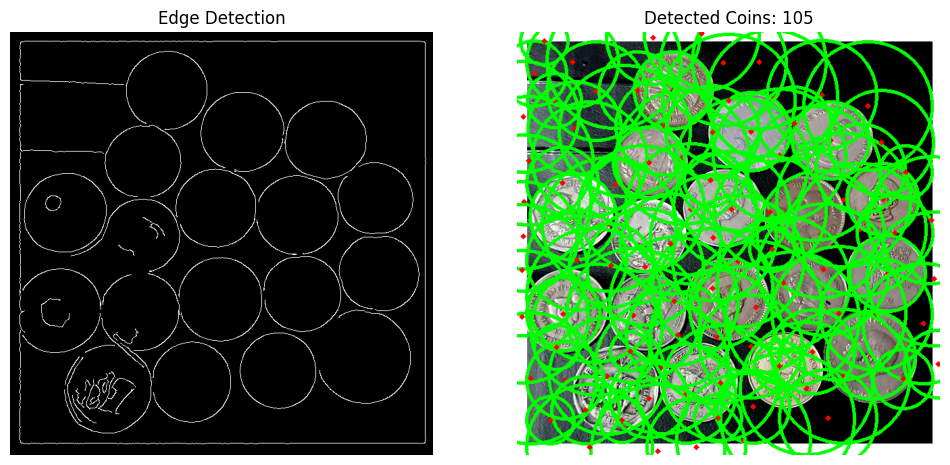

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('image.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to smooth the image
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Detect edges using Canny Edge Detector
edges = cv2.Canny(blurred, 50, 150)

# Use HoughCircles to detect circular shapes (coins)
circles = cv2.HoughCircles(
    gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
    param1=100, param2=30, minRadius=20, maxRadius=100
)

# Draw detected circles on the original image
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 3)  # Draw outer circle
        cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)  # Draw center

# Count the number of coins detected
num_coins = len(circles[0]) if circles is not None else 0

# Display the results using Matplotlib
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
ax[0].set_title("Edge Detection")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[1].set_title(f"Detected Coins: {num_coins}")
ax[1].axis("off")

plt.show()


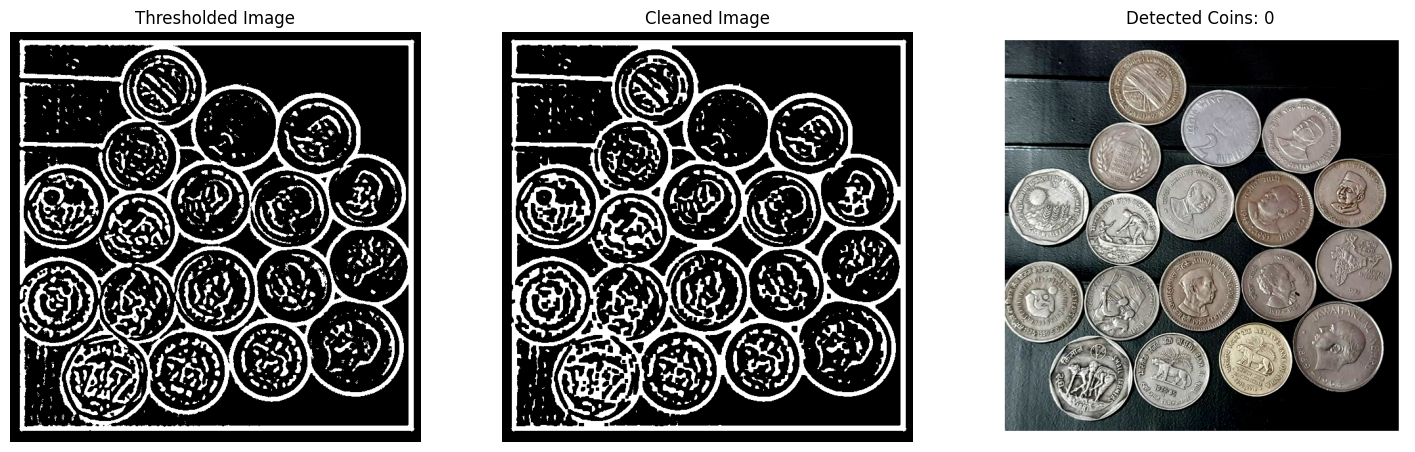

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('image.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Use Adaptive Thresholding for better segmentation
thresh = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 2
)

# Perform morphological operations to remove small noise
kernel = np.ones((5, 5), np.uint8)
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Find contours (potential coins)
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area and circularity
valid_coins = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    
    if perimeter == 0:  # Avoid division by zero
        continue
    
    circularity = 4 * np.pi * (area / (perimeter * perimeter))
    
    if 0.7 < circularity < 1.2 and 500 < area < 5000:  # Approximate range for coins
        valid_coins.append(cnt)

# Draw detected coins on the original image
output_image = image.copy()
for coin in valid_coins:
    cv2.drawContours(output_image, [coin], -1, (0, 255, 0), 3)

# Count the number of coins detected
num_coins = len(valid_coins)

# Display the results using Matplotlib
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
ax[0].set_title("Thresholded Image")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(cleaned, cv2.COLOR_BGR2RGB))
ax[1].set_title("Cleaned Image")
ax[1].axis("off")

ax[2].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
ax[2].set_title(f"Detected Coins: {num_coins}")
ax[2].axis("off")

plt.show()

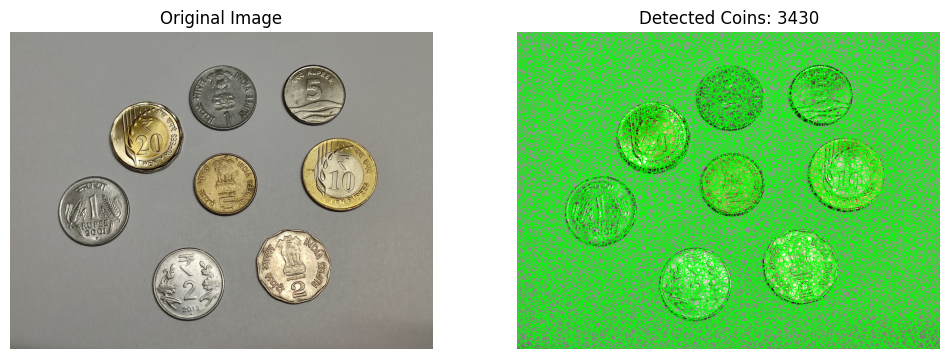

Total coins detected: 3430


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('coins.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Adaptive Threshold for better contrast
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 4)

# Morphological closing to fill small gaps
kernel = np.ones((5,5), np.uint8)
binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Detect circles using Hough Transform
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
                           param1=50, param2=30, minRadius=20, maxRadius=100)

# Draw the detected circles
output = image.copy()
count = 0

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 3)
        count += 1

# Display the result using matplotlib
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
ax[1].set_title(f"Detected Coins: {count}")
ax[1].axis("off")

plt.show()

print(f"Total coins detected: {count}")


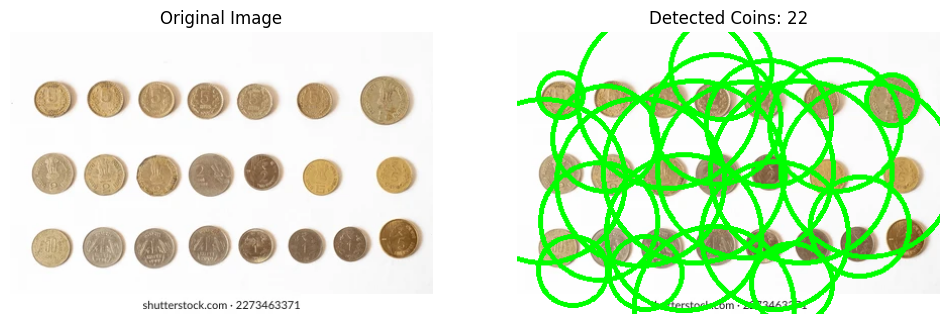

Total coins detected: 22


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('picture.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Adaptive Threshold for better contrast
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 4)

# Morphological closing to fill small gaps
kernel = np.ones((5,5), np.uint8)
binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Detect circles using Hough Transform
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
                           param1=50, param2=30, minRadius=20, maxRadius=100)

# Draw the detected circles
output = image.copy()
count = 0

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 3)
        count += 1

# Display the result using matplotlib
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
ax[1].set_title(f"Detected Coins: {count}")
ax[1].axis("off")

plt.show()

print(f"Total coins detected: {count}")


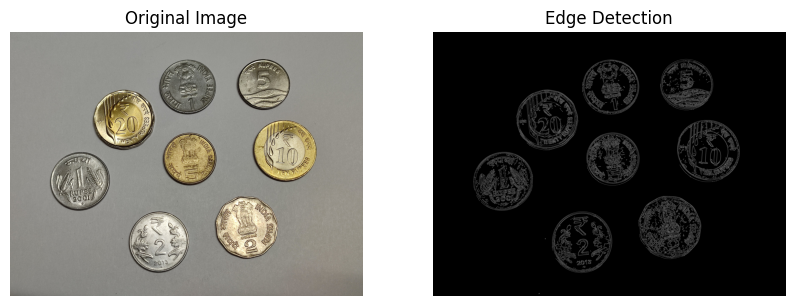

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('coins.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny Edge Detection
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")

plt.show()


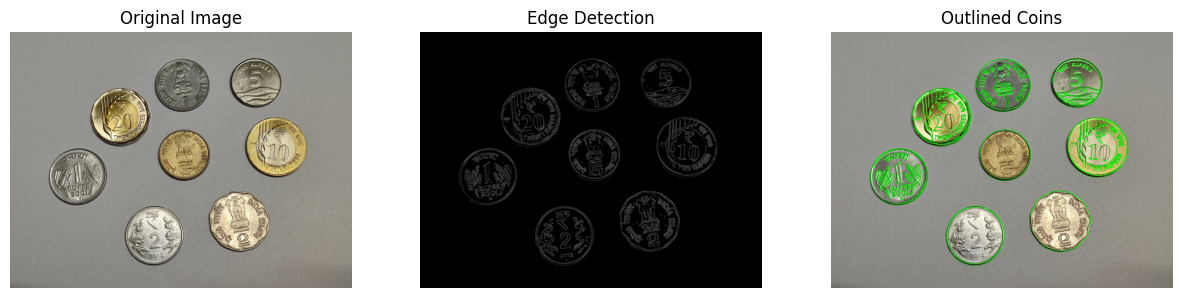

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('coins.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (7, 7), 3)

# Use Canny Edge Detection
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Green contours

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Outlined Coins")
plt.axis("off")

plt.show()


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('denomination.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(122)
plt.imshow(gray);
plt.title("Grayscale Image");


error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [30]:
# Split cell into channels
# Store them in variables imageB, imageG, imageR
imageB = image[:,:,0]
imageG = image[:,:,1]
imageR = image[:,:,2]

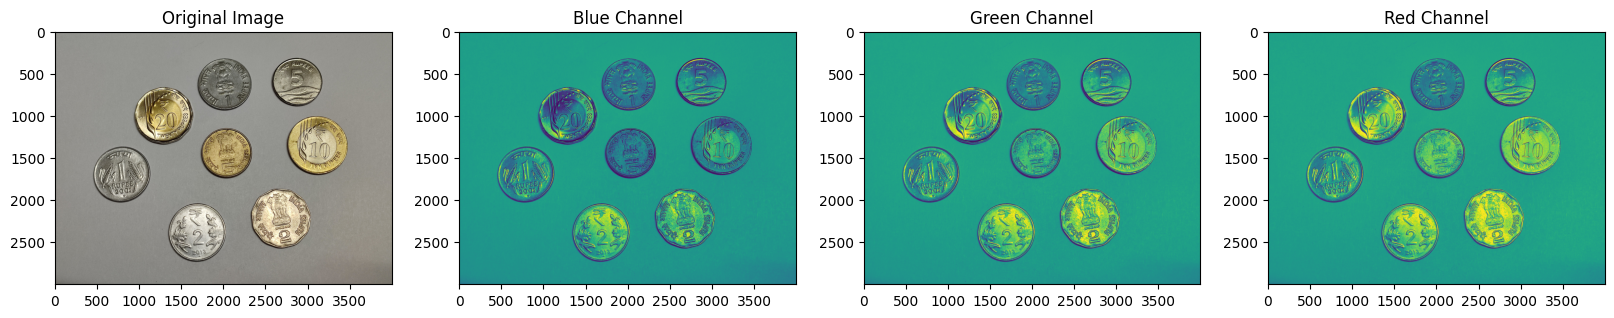

In [31]:
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(142)
plt.imshow(imageB);
plt.title("Blue Channel")
plt.subplot(143)
plt.imshow(imageG);
plt.title("Green Channel")
plt.subplot(144)
plt.imshow(imageR);
plt.title("Red Channel");

Threshold Value = 127, Max Value = 255


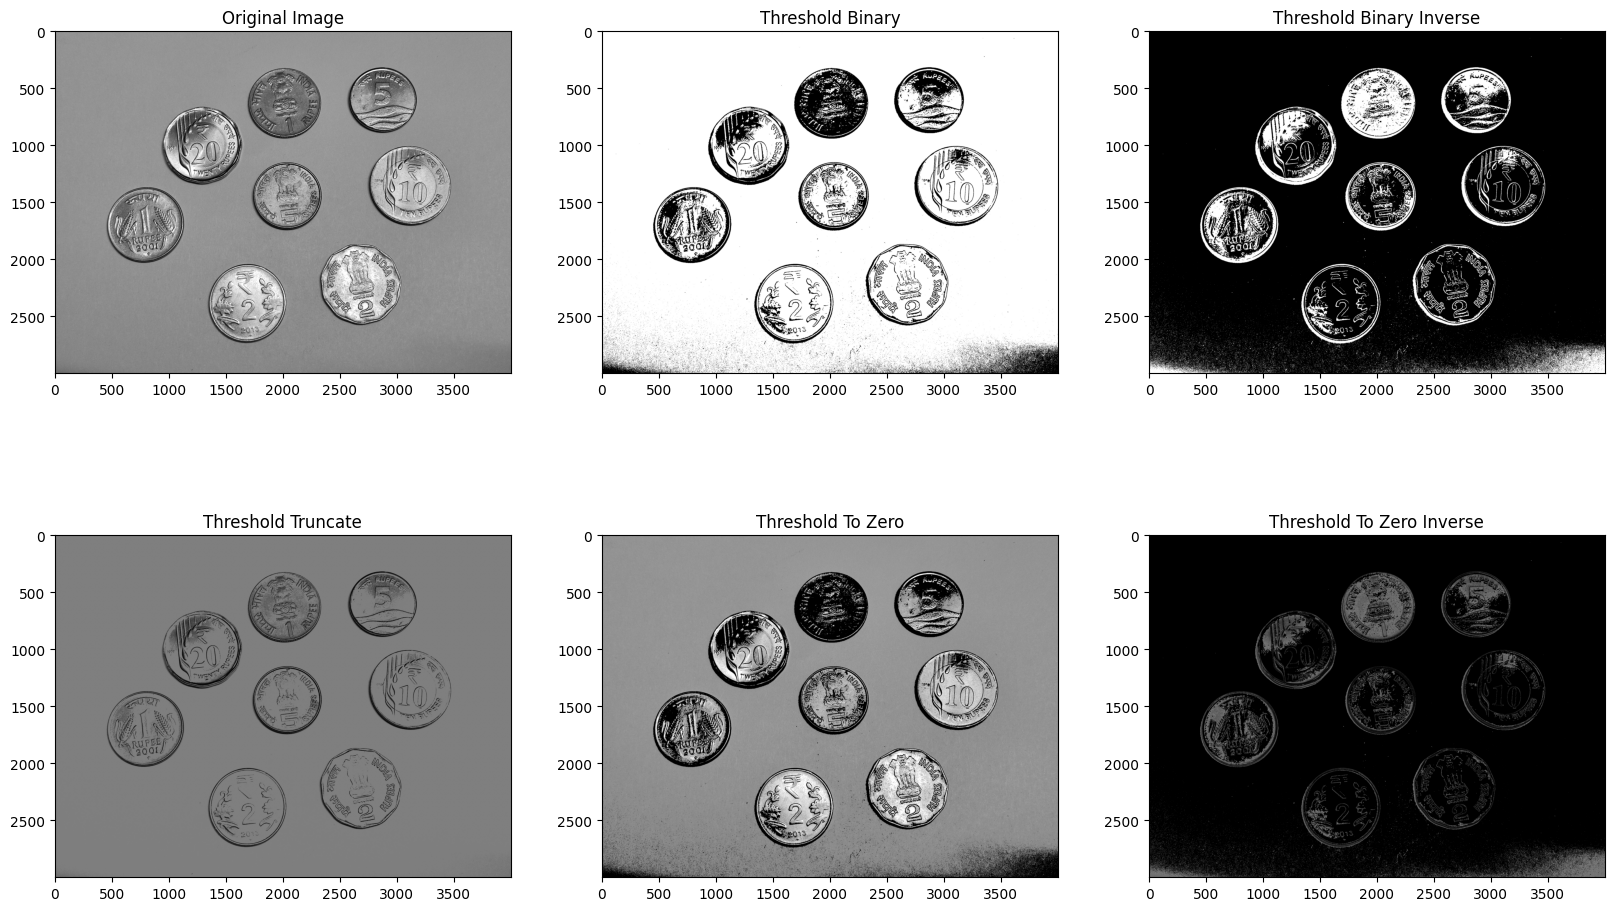

In [32]:
# Threshold Analysis
# Notes: imageGray did not work. Detected 8 coins and contained a lot of noise which is giving incorrect results
# in rest of the analysis so switched to green channel which gave more accurate results.
src = imageG.copy()
thresh = 127
maxValue = 255
th, dst_bin = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY)
th, dst_bin_inv = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY_INV)
th, dst_trunc = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TRUNC)
th, dst_to_zero = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TOZERO)
th, dst_to_zero_inv = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TOZERO_INV)

print("Threshold Value = {}, Max Value = {}".format(thresh, maxValue))
plt.figure(figsize=[20,12])
plt.subplot(231);plt.imshow(src, cmap='gray', vmin=0, vmax=255);plt.title("Original Image");
plt.subplot(232);plt.imshow(dst_bin, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary");
plt.subplot(233);plt.imshow(dst_bin_inv, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary Inverse");
plt.subplot(234);plt.imshow(dst_trunc, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Truncate");
plt.subplot(235);plt.imshow(dst_to_zero, cmap='gray', vmin=0, vmax=255);plt.title("Threshold To Zero");
plt.subplot(236);plt.imshow(dst_to_zero_inv, cmap='gray', vmin=0, vmax=255);plt.title("Threshold To Zero Inverse");

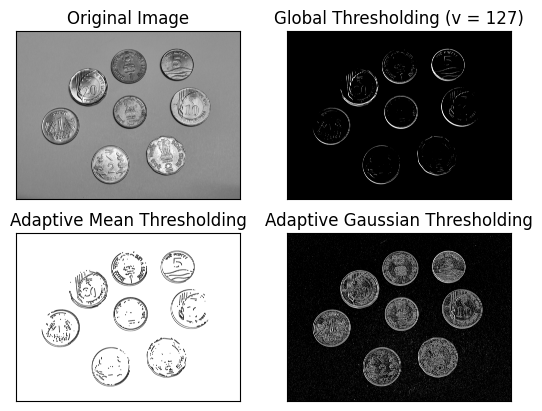

In [33]:
img = cv2.GaussianBlur(src, (11, 11), 0)
ret,th1 = cv2.threshold(img,50,255,cv2.THRESH_BINARY_INV)
th2 = cv2.adaptiveThreshold(th1,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

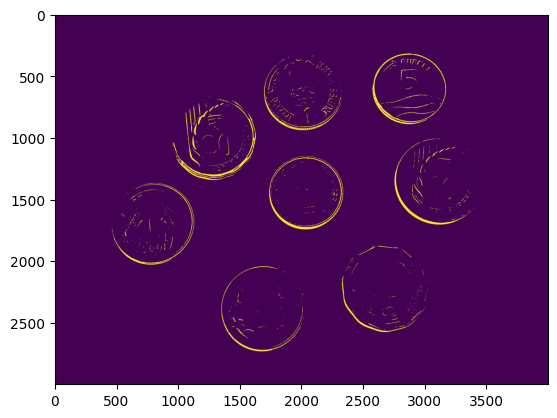

In [34]:
# Guassian blur with binary inverse looks promising. 
img = cv2.GaussianBlur(src, (11, 11), 0)
ret,threshIm = cv2.threshold(img,50,255,cv2.THRESH_BINARY_INV)
plt.imshow(threshIm)

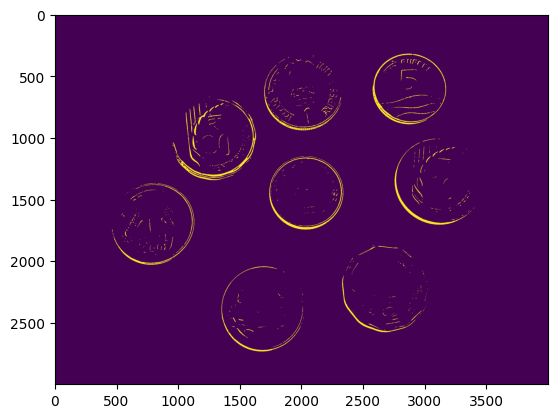

In [35]:
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2))
morph = cv2.erode(th1, kernel, iterations = 1)
plt.imshow(morph)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2))
morph = cv2.dilate(morph, kernel, iterations = 1)
plt.imshow(morph)

In [36]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.7

In [37]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

In [38]:
# Detect blobs
keypoints = detector.detect(morph)

blobs = cv2.cvtColor(morph, cv2.COLOR_GRAY2BGR)
 
# Mark blobs using image annotation concepts we have studied so far
index = 0
for k in keypoints:
    index = index + 1
    x,y = k.pt
    x=int(round(x))
    y=int(round(y))
    # Mark center in BLACK
    cv2.circle(blobs,(x,y),5,(0,0,0),-1)
    # Get radius of blob
    diameter = k.size
    radius = int(round(diameter/2))
    # Mark blob in RED
    cv2.circle(blobs,(x,y),radius,(0,0,255),2)

Number of coins found = 3


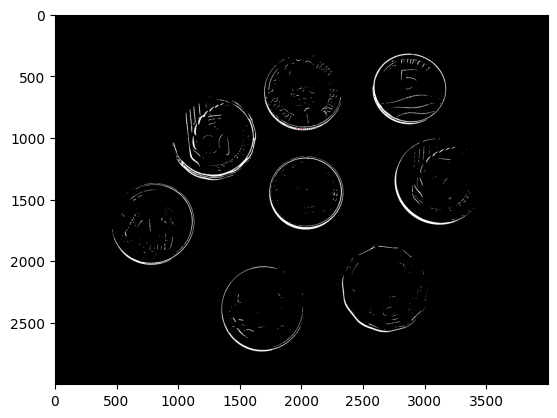

In [39]:
# Print number of coins detected
plt.imshow(blobs[:,:,::-1])
print("Number of coins found = {}".format(len(keypoints)))

In [4]:
import numpy as np
import cv2 

img = cv2.imread("coins.jpg")
img = cv2.resize(img, (640, 800))
image_copy = img.copy()
img = cv2.GaussianBlur(img, (7, 7), 3)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
image_copy = cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 3)

cv2.imshow("first", image_copy)

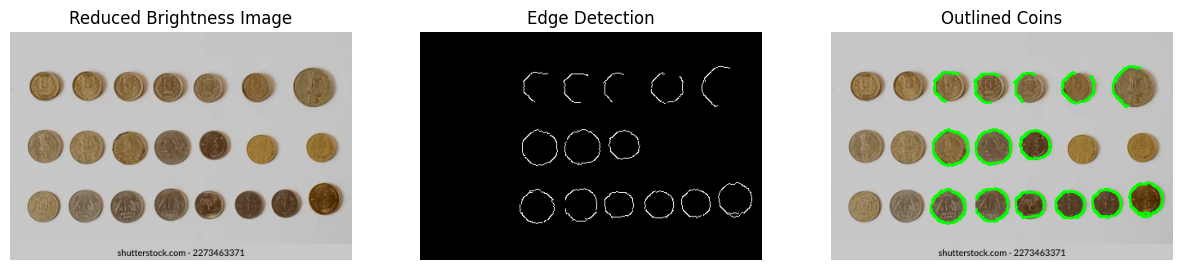

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('picture.jpg')

# Reduce brightness by subtracting a value from all pixel intensities
image = cv2.convertScaleAbs(image, alpha=0.9, beta=-30)  # alpha < 1 reduces contrast, beta < 0 reduces brightness

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply stronger Gaussian Blur to smooth edges
blurred = cv2.GaussianBlur(gray, (11, 11), 5)  # Increased kernel size for stronger blur

# Use Canny Edge Detection
edges = cv2.Canny(blurred, threshold1=40, threshold2=120)  # Adjusted thresholds for better edge detection

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Green contours

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Reduced Brightness Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Outlined Coins")
plt.axis("off")

plt.show()


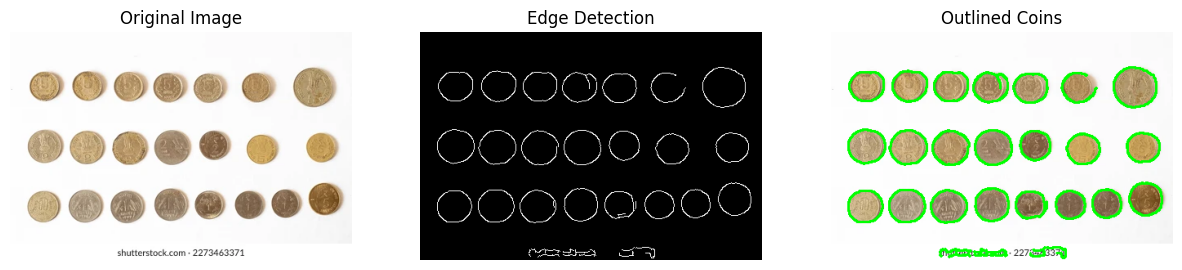

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('picture.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (7, 7), 3)

# Use Canny Edge Detection
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Green contours

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Outlined Coins")
plt.axis("off")

plt.show()


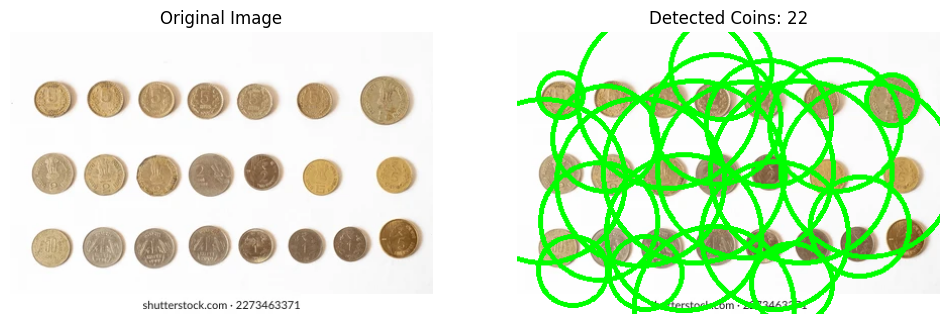

Total coins detected: 22


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('picture.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Adaptive Threshold for better contrast
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 4)

# Morphological closing to fill small gaps
kernel = np.ones((5,5), np.uint8)
binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Detect circles using Hough Transform
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
                           param1=50, param2=30, minRadius=20, maxRadius=100)

# Draw the detected circles
output = image.copy()
count = 0

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 3)
        count += 1

# Display the result using matplotlib
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
ax[1].set_title(f"Detected Coins: {count}")
ax[1].axis("off")

plt.show()

print(f"Total coins detected: {count}")


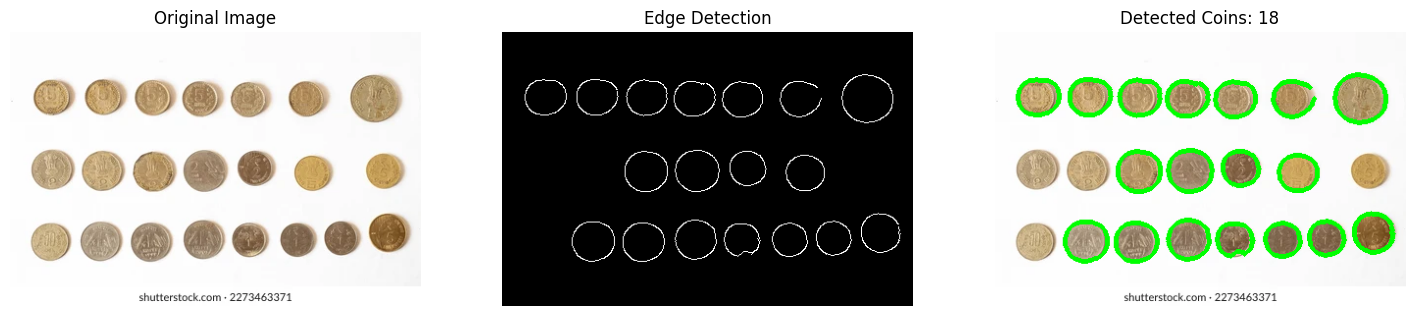

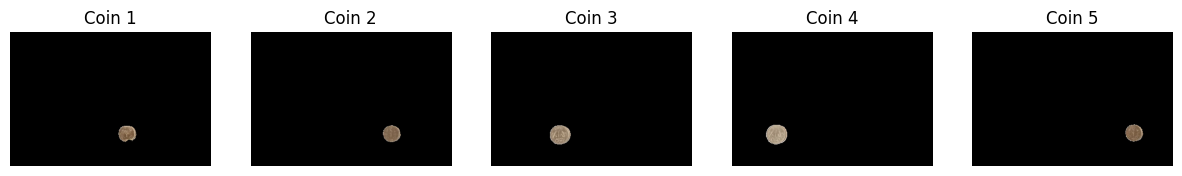

Total Coins Detected: 18


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def count_and_segment_coins(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to smooth the image
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)

    # Edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours (detect coins)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours around detected coins
    output = image.copy()
    cv2.drawContours(output, contours, -1, (0, 255, 0), 3)

    # Create a binary mask for segmentation
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, contours, -1, 255, thickness=cv2.FILLED)

    # Segment each detected coin
    segmented_coins = []
    for idx, contour in enumerate(contours):
        # Create an individual mask for each coin
        coin_mask = np.zeros_like(gray)
        cv2.drawContours(coin_mask, [contour], -1, 255, thickness=cv2.FILLED)

        # Extract the coin using bitwise AND
        segmented_coin = cv2.bitwise_and(image, image, mask=coin_mask)
        segmented_coins.append(segmented_coin)

    # Count total number of coins
    total_coins = len(contours)

    # Display Results
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    ax[1].imshow(edges, cmap="gray")
    ax[1].set_title("Edge Detection")
    ax[1].axis("off")

    ax[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    ax[2].set_title(f"Detected Coins: {total_coins}")
    ax[2].axis("off")

    plt.show()

    # Display segmented coins
    fig, axs = plt.subplots(1, min(5, total_coins), figsize=(15, 5))
    for i in range(min(5, total_coins)):  # Show up to 5 segmented coins
        axs[i].imshow(cv2.cvtColor(segmented_coins[i], cv2.COLOR_BGR2RGB))
        axs[i].set_title(f"Coin {i+1}")
        axs[i].axis("off")

    plt.show()

    print(f"Total Coins Detected: {total_coins}")

# Run the function with your image
count_and_segment_coins('picture.jpg')


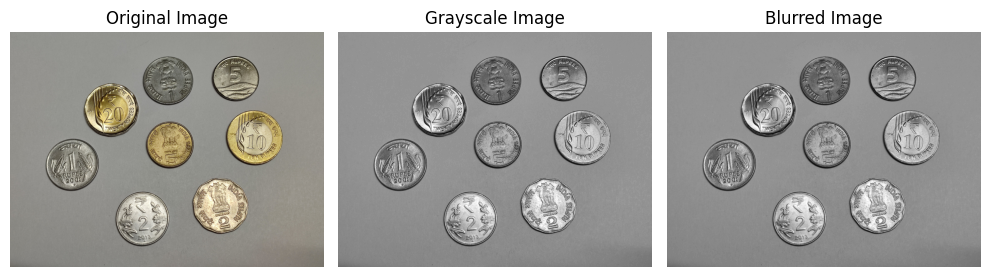

In [8]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("coins.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blur = cv2.GaussianBlur(gray, (7,7), 0)

# Convert BGR to RGB for correct color display in matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display images using matplotlib
plt.figure(figsize=(10, 7))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

# Grayscale Image
plt.subplot(1, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

# Blurred Image
plt.subplot(1, 3, 3)
plt.imshow(blur, cmap='gray')
plt.title("Blurred Image")
plt.axis('off')

plt.tight_layout()
plt.show()

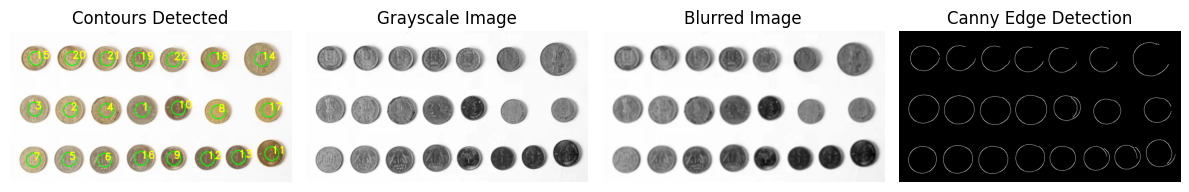

In [13]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("final.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blur = cv2.GaussianBlur(gray, (7,7), 0)

# Apply Canny edge detection
canny = cv2.Canny(blur, 90, 255)

# Find contours
contours, hierarchy = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area
sortedCon = sorted(contours, key=cv2.contourArea, reverse=True)

# Draw contours and label them
for i, cont in enumerate(sortedCon):
    x, y, w, h = cv2.boundingRect(cont)
    
    # Find the center of each detected object
    center_x = x + int(w / 2)
    center_y = y + int(h / 2)
    
    # Draw a circle at the center
    cv2.circle(img, (center_x, center_y), 20, (0, 255, 0), 2)

    # Put label number
    cv2.putText(img, str(i+1), (center_x, center_y), cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 255, 255), 2)

# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display images using matplotlib
plt.figure(figsize=(12, 7))

# Original Image with labeled contours
plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title("Contours Detected")
plt.axis('off')

# Grayscale Image
plt.subplot(1, 4, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

# Blurred Image
plt.subplot(1, 4, 3)
plt.imshow(blur, cmap='gray')
plt.title("Blurred Image")
plt.axis('off')

# Canny Edge Image
plt.subplot(1, 4, 4)
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()


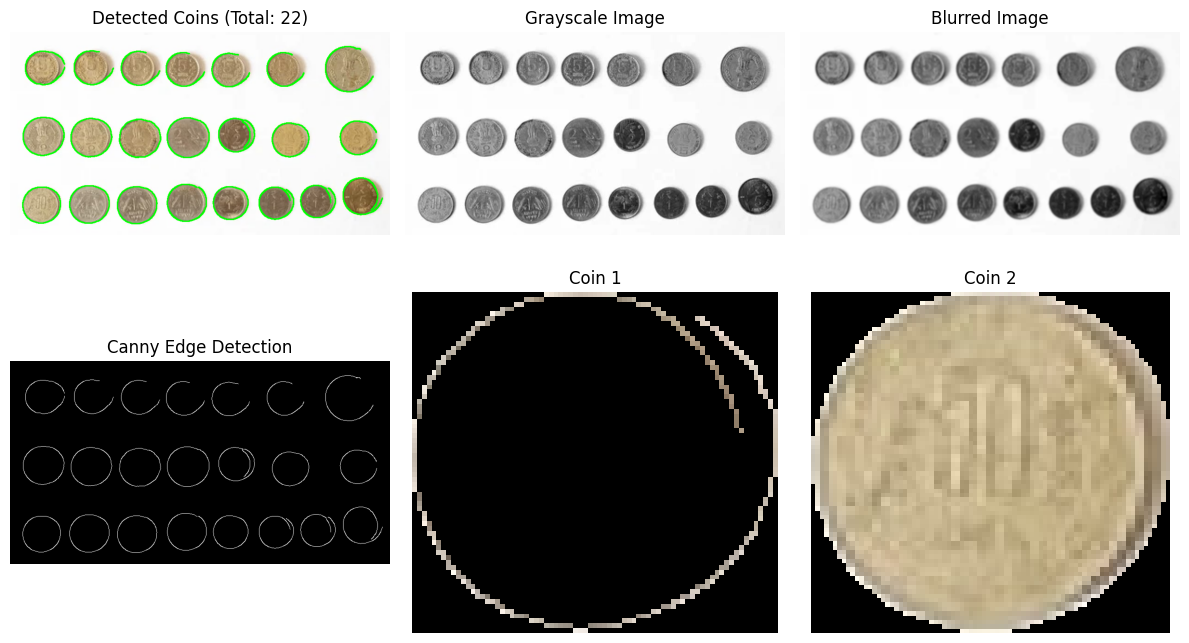

Total number of coins detected: 22


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("final.jpg")
original = img.copy()  # Keep a copy for displaying results

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blur = cv2.GaussianBlur(gray, (7, 7), 0)

# Apply Canny edge detection
canny = cv2.Canny(blur, 90, 255)

# Find contours
contours, _ = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Count total number of coins
total_coins = len(contours)

# Draw contours on the original image
cv2.drawContours(original, contours, -1, (0, 255, 0), 2)

# Segment Each Coin
segmented_coins = []
for i, cont in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cont)
    
    # Extract each coin using masking
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [cont], -1, 255, thickness=cv2.FILLED)
    segmented_coin = cv2.bitwise_and(img, img, mask=mask)
    
    # Crop the segmented coin
    coin_crop = segmented_coin[y:y+h, x:x+w]
    segmented_coins.append(coin_crop)

# Convert original image to RGB for matplotlib
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# Display images using matplotlib
plt.figure(figsize=(12, 7))

# Original Image with Contours
plt.subplot(2, 3, 1)
plt.imshow(original_rgb)
plt.title(f"Detected Coins (Total: {total_coins})")
plt.axis('off')

# Grayscale Image
plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

# Blurred Image
plt.subplot(2, 3, 3)
plt.imshow(blur, cmap='gray')
plt.title("Blurred Image")
plt.axis('off')

# Canny Edge Image
plt.subplot(2, 3, 4)
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

# Display First Two Segmented Coins
for i in range(min(2, len(segmented_coins))):  
    plt.subplot(2, 3, 5 + i)
    plt.imshow(cv2.cvtColor(segmented_coins[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Coin {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print total coin count
print(f"Total number of coins detected: {total_coins}")

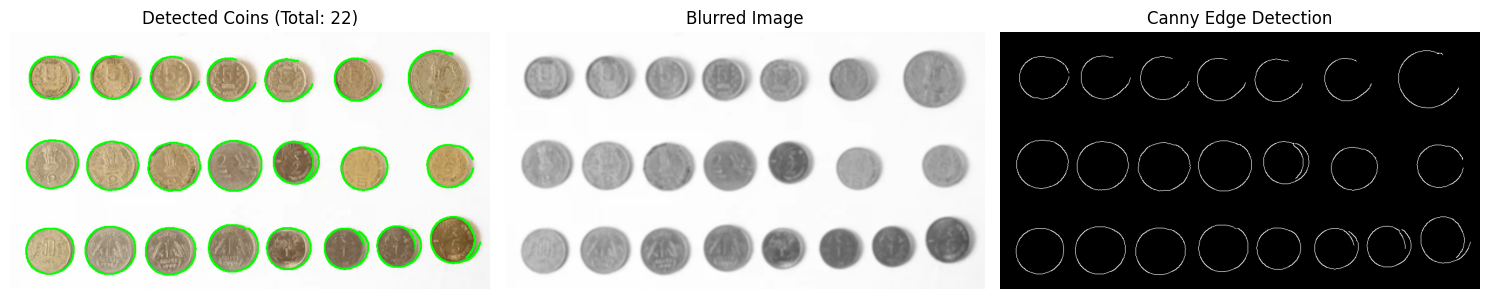

Total number of coins detected: 22


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("final.jpg")
original = img.copy()  # Keep a copy for displaying results

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blur = cv2.GaussianBlur(gray, (7, 7), 0)

# Apply Canny edge detection
canny = cv2.Canny(blur, 90, 255)

# Find contours
contours, _ = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Count total number of coins
total_coins = len(contours)

# Draw contours on the original image
cv2.drawContours(original, contours, -1, (0, 255, 0), 2)

# Convert original image to RGB for matplotlib
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
blur_rgb = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
canny_rgb = cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)

# Display images using matplotlib
plt.figure(figsize=(15, 10))

# Original Image with Contours and Coin Count
plt.subplot(1, 3, 1)
plt.imshow(original_rgb)
plt.title(f"Detected Coins (Total: {total_coins})")
plt.axis('off')

# Grayscale Image (Optional, if you want to see it)
plt.subplot(1, 3, 2)
plt.imshow(blur_rgb)
plt.title("Blurred Image")
plt.axis('off')

# Canny Edge Detection Image
plt.subplot(1, 3, 3)
plt.imshow(canny_rgb, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print total coin count
print(f"Total number of coins detected: {total_coins}")
